<a href="https://colab.research.google.com/github/mannu-098/Heart_disease_prediction/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!unzip "/content/drive/MyDrive/Colab Notebooks/dog-vision/dog-breed-identification.zip" -d "drive/MyDrive/dog vision"

🐶- # END-TO-END DOG BREED CLASS PROBLEMS

##Let's setup for the model

In [2]:
# IMPORTING TENSORFLOW INTO COLLAB
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF HUB version:", hub.__version__)

TF version: 2.7.0
TF HUB version: 0.12.0


In [3]:
#CHECKING FOR GPU AVAILAIBILITY
print("GPU", "AVAILAIBLE (YESSSSSS)" if tf.config.list_physical_devices("GPU") else "not availaible :(")

GPU AVAILAIBLE (YESSSSSS)


# GETTING OUR DATA CONVERTED INTO TENSORS



In [4]:
import pandas as pd
label_csv = pd.read_csv("/content/drive/MyDrive/dog vision/labels.csv")
label_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [5]:
label_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,20c283ef7832a436eb919800f2be1718,scottish_deerhound
freq,1,126


In [6]:
label_csv.dtypes

id       object
breed    object
dtype: object

In [7]:
label_csv.isna().sum()

id       0
breed    0
dtype: int64

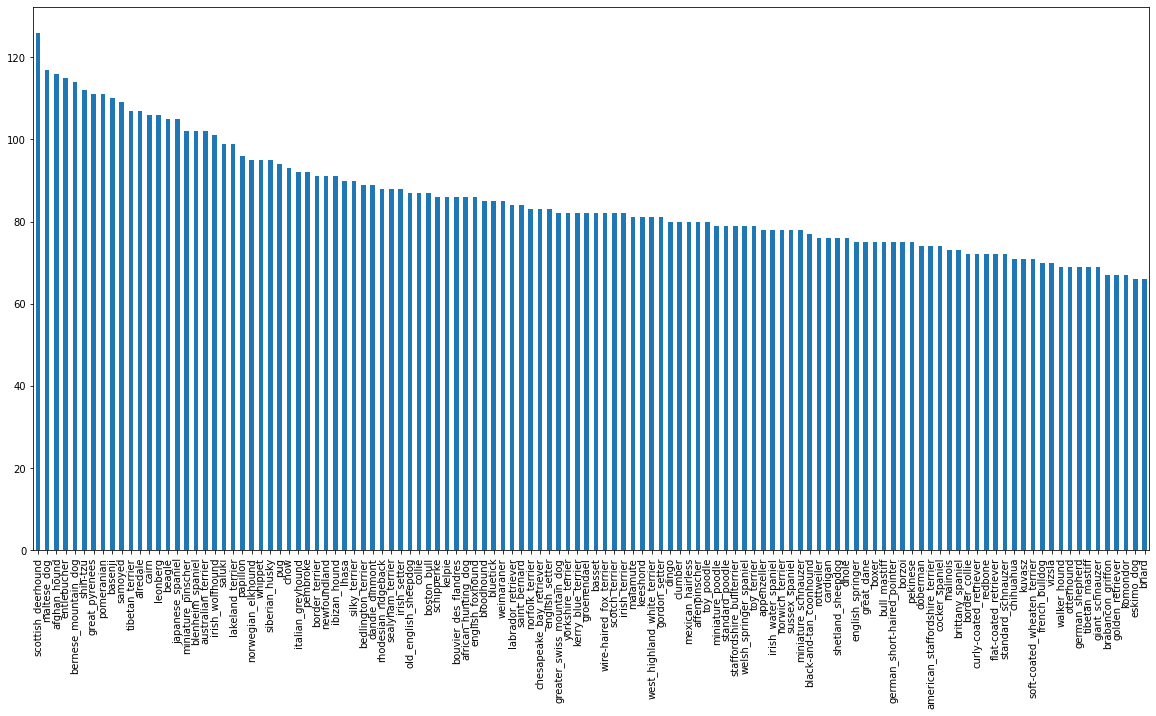

In [8]:
label_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [9]:
label_csv["breed"].value_counts().median()

82.0

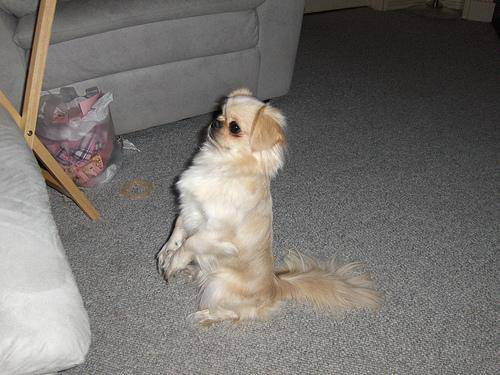

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg")

### GETTING IMAGES AND THEIR LABELS

In [11]:
filenames = ["/content/drive/MyDrive/dog vision/train/" + fname + ".jpg" for fname in label_csv["id"]]
filenames[:10]

['/content/drive/MyDrive/dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:
import os
if len(os.listdir("drive/MyDrive/dog vision/train/")) == len(filenames):
  print("number of files matches in both folder!!!!")
else:
  print("number of files does not matches in both folder!!!") 

number of files matches in both folder!!!!


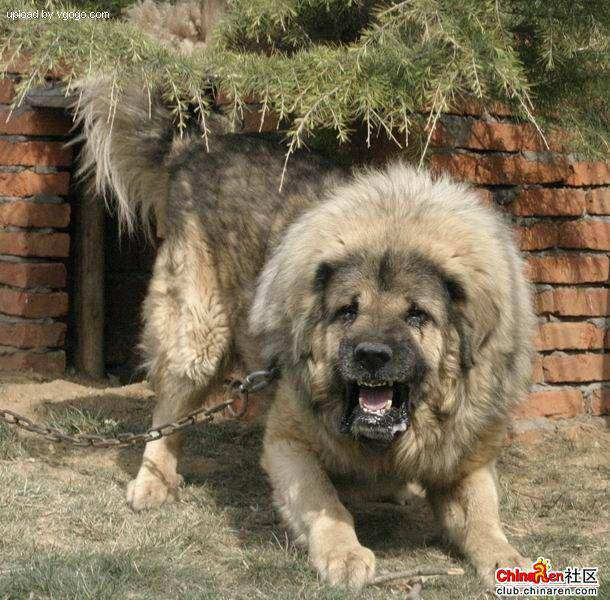

In [13]:
Image(filenames[9000])

In [14]:
import numpy as np
labels = label_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [15]:
len(labels)

10222

In [16]:
if len(labels) == len(filenames):
  print("Number of filenames equals label")
else:
  print("Number of filenames does not equals labels") 

Number of filenames equals label


In [17]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [18]:
len(unique_breeds)

120

In [19]:
# TURN A SINGLE LABEL INTO ARRAY OF BOOLEANS
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
# turning every label into boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [21]:
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


# CREATING OUR OWN VALIDATION TEST

In [22]:
X = filenames
y = boolean_labels

In [23]:
# set number of images used for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [24]:
# lets do some train, test, split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [25]:
# let's have a quick look at our data
X_train[:2], y_train[:2]

(['/content/drive/MyDrive/dog vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/dog vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,

## TURNING OUR IMAGES INTO TENSORS

In [26]:
# convert images to numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [27]:
# turning image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [28]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image
    

In [29]:
tensor = tf.io.read_file(filenames[26])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

## TURNING OUR DATA INTO BATCHES

In [30]:
# lets create a simple function to return tuple(image, label)
def get_image_label(image_path, label):

  image = process_image(image_path)
  return image, label

In [31]:
# demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

### now lets make a function to turn all our data into batches


In [32]:
BATCH_SIZE=42
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating validation data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                 tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                 tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
  return data_batch


In [33]:
# creating training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches....


In [34]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## VISUALIZING DATA BATCHES

In [35]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
      ax = plt.subplot(5, 5, i+1)
      plt.imshow(images[i])
      plt.title(unique_breeds[labels[i].argmax()])
      plt.axis("off")


In [36]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [37]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[6.44863069e-01, 6.25255227e-01, 6.04737043e-01],
          [9.17616129e-01, 9.01334584e-01, 8.61173511e-01],
          [9.23774600e-01, 9.11379635e-01, 8.44082713e-01],
          ...,
          [9.43161488e-01, 9.96240258e-01, 9.98177230e-01],
          [9.68627512e-01, 9.87640083e-01, 9.99404728e-01],
          [9.63200271e-01, 9.78886545e-01, 9.90651250e-01]],
 
         [[6.36794984e-01, 6.17187142e-01, 5.96668959e-01],
          [9.22561049e-01, 9.06279504e-01, 8.66118431e-01],
          [9.26176965e-01, 9.13782001e-01, 8.46485078e-01],
          ...,
          [9.63416755e-01, 9.87406194e-01, 9.90183473e-01],
          [9.71055388e-01, 9.87640083e-01, 9.99404728e-01],
          [9.63200271e-01, 9.78886545e-01, 9.90651250e-01]],
 
         [[6.33954883e-01, 6.14347041e-01, 5.93828857e-01],
          [9.24437463e-01, 9.08155918e-01, 8.67994845e-01],
          [9.27065909e-01, 9.14670944e-01, 8.47374022e-01],
          ...,
          [9.87710118e-01, 9.74772453e-01, 9.7869

In [38]:
len(train_images), len(train_labels)

(42, 42)

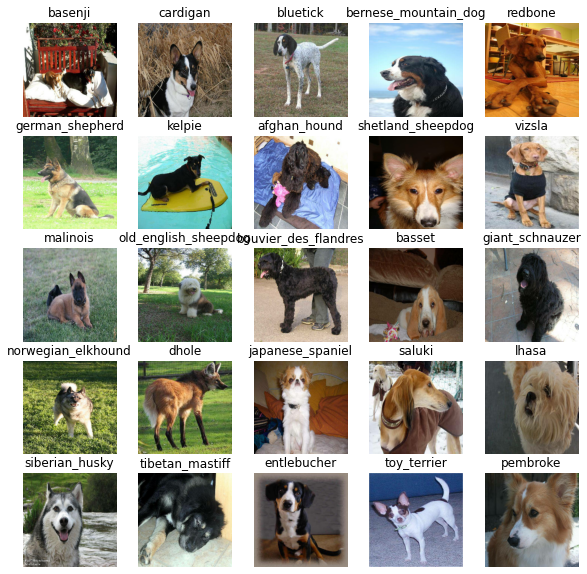

In [39]:
# now lets visualize the data in training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

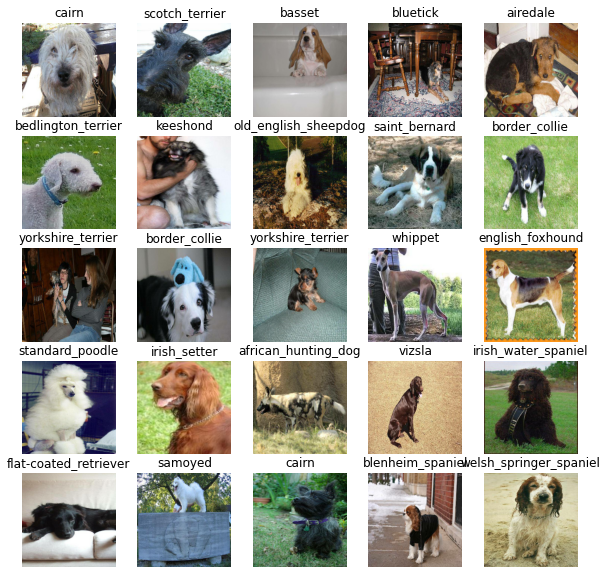

In [40]:
# now lets visualize the validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## building a model

In [41]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [46]:
# let's create a function for keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)
   
  model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL),
                                              tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                                    activation="softmax")])
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")
  model.build(INPUT_SHAPE)
  return model

In [47]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_2 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## CREATING CALLBACKS

In [48]:
%load_ext tensorboard

In [49]:
import datetime
def create_tensorboard_callback():
  logdir = os.path.join("/content/drive/MyDrive/Data/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [50]:
# creating early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## TRAINING A MODEL ON SUBSET OF DATA

In [51]:
# checking if GPU is availaible before training our data
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!!)


In [52]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [53]:
# building a function to train and return a model
def train_model():
  model = create_model()
  tensorboard = create_tensorboard_callback()
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  return model

In [54]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
20/20 [==============================] - 25s 348ms/step - loss: 4.7687 - accuracy: 0.0688 - val_loss: 3.5546 - val_accuracy: 0.1950
Epoch 2/100
20/20 [==============================] - 5s 235ms/step - loss: 1.9346 - accuracy: 0.6225 - val_loss: 2.2382 - val_accuracy: 0.4950
Epoch 3/100
20/20 [==============================] - 5s 234ms/step - loss: 0.7416 - accuracy: 0.8988 - val_loss: 1.6996 - val_accuracy: 0.5950
Epoch 4/100
20/20 [==============================] - 5s 239ms/step - loss: 0.3455 - accuracy: 0.9812 - val_loss: 1.4911 - val_accuracy: 0.6000
Epoch 5/100
20/20 [==============================] - 5s 224ms/step - loss: 0.1982 - accuracy: 0.9887 - val_loss: 1.3874 - val_accuracy: 0.6350
Epoch 6/100
20/20 [==============================] - 5s 247ms/step - loss: 0.1323 - accuracy: 1.0000 - val_loss: 1.3381 - val_accuracy: 0.6550
Epoch 7/100
20/20 [=============================

In [56]:
# making prediction on the validation data
predictions = model.predict(val_data, verbose=1)
predictions

5/5 [==============================] - 3s 276ms/step


array([[2.24141846e-03, 1.67061167e-04, 3.39317019e-04, ...,
        3.80668265e-04, 2.96982580e-05, 1.72702805e-03],
       [6.61765924e-03, 1.84698240e-03, 1.37389321e-02, ...,
        6.15622092e-04, 2.46154820e-03, 1.08719665e-04],
       [1.62423833e-03, 2.89380620e-03, 2.84248265e-04, ...,
        6.01438945e-03, 3.31527583e-04, 2.41931388e-03],
       ...,
       [1.36452454e-05, 7.83220821e-05, 1.71848424e-05, ...,
        4.15631548e-05, 7.83763317e-05, 1.59099480e-04],
       [9.28742718e-03, 3.35988705e-04, 1.15025498e-04, ...,
        2.14630185e-04, 2.86688610e-05, 9.64460801e-03],
       [1.31173889e-04, 1.63446803e-05, 1.38029747e-03, ...,
        1.56422902e-03, 2.27738361e-04, 4.01751531e-05]], dtype=float32)

In [58]:
predictions.shape

(200, 120)

In [59]:
# converting array of predictions into actual label
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}")
print(f"Sum: {np.sum(predictions[0])}")
print(f"Max index: {np.argmax(predictions[0])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}")

[2.24141846e-03 1.67061167e-04 3.39317019e-04 1.07472770e-04
 5.77177037e-04 2.30706264e-05 2.59725712e-02 3.96773656e-04
 5.00079885e-04 1.14622795e-04 9.77790914e-04 9.69064495e-05
 2.03294418e-04 7.06130813e-05 1.06464977e-04 1.06398889e-04
 5.88090916e-04 9.15878564e-02 1.58170478e-05 1.73621142e-04
 6.65555999e-04 3.05871334e-04 2.28087611e-05 1.15548854e-03
 2.56044059e-05 5.70694567e-04 2.69613951e-01 7.29487874e-05
 8.90357886e-04 2.22495029e-04 1.39789176e-04 1.30887062e-03
 5.53080521e-04 1.94624931e-06 4.74684057e-05 3.93896848e-02
 1.16641941e-05 6.26511319e-05 2.95832695e-04 6.01107931e-05
 3.71867849e-04 1.73801782e-05 4.29202453e-04 1.68303930e-04
 9.34829677e-06 7.89866463e-05 8.34245748e-06 9.24303822e-05
 6.87758788e-04 1.18800061e-04 1.87314858e-04 1.07943160e-05
 2.93666992e-04 4.80047820e-05 1.55675589e-04 2.22640429e-05
 3.16496677e-04 3.16487625e-03 5.31981583e-04 2.79223859e-01
 2.48882076e-04 9.21722967e-05 6.68874243e-04 5.09989768e-05
 2.42513619e-04 2.115123

In [63]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'irish_wolfhound'

In [64]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [65]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

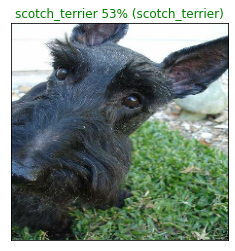

In [66]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [67]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

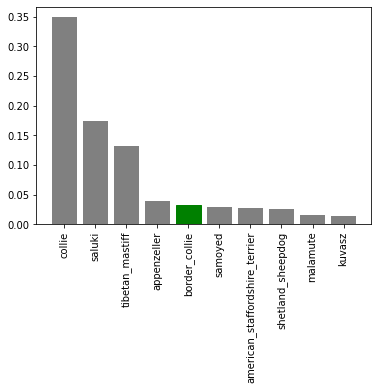

In [68]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

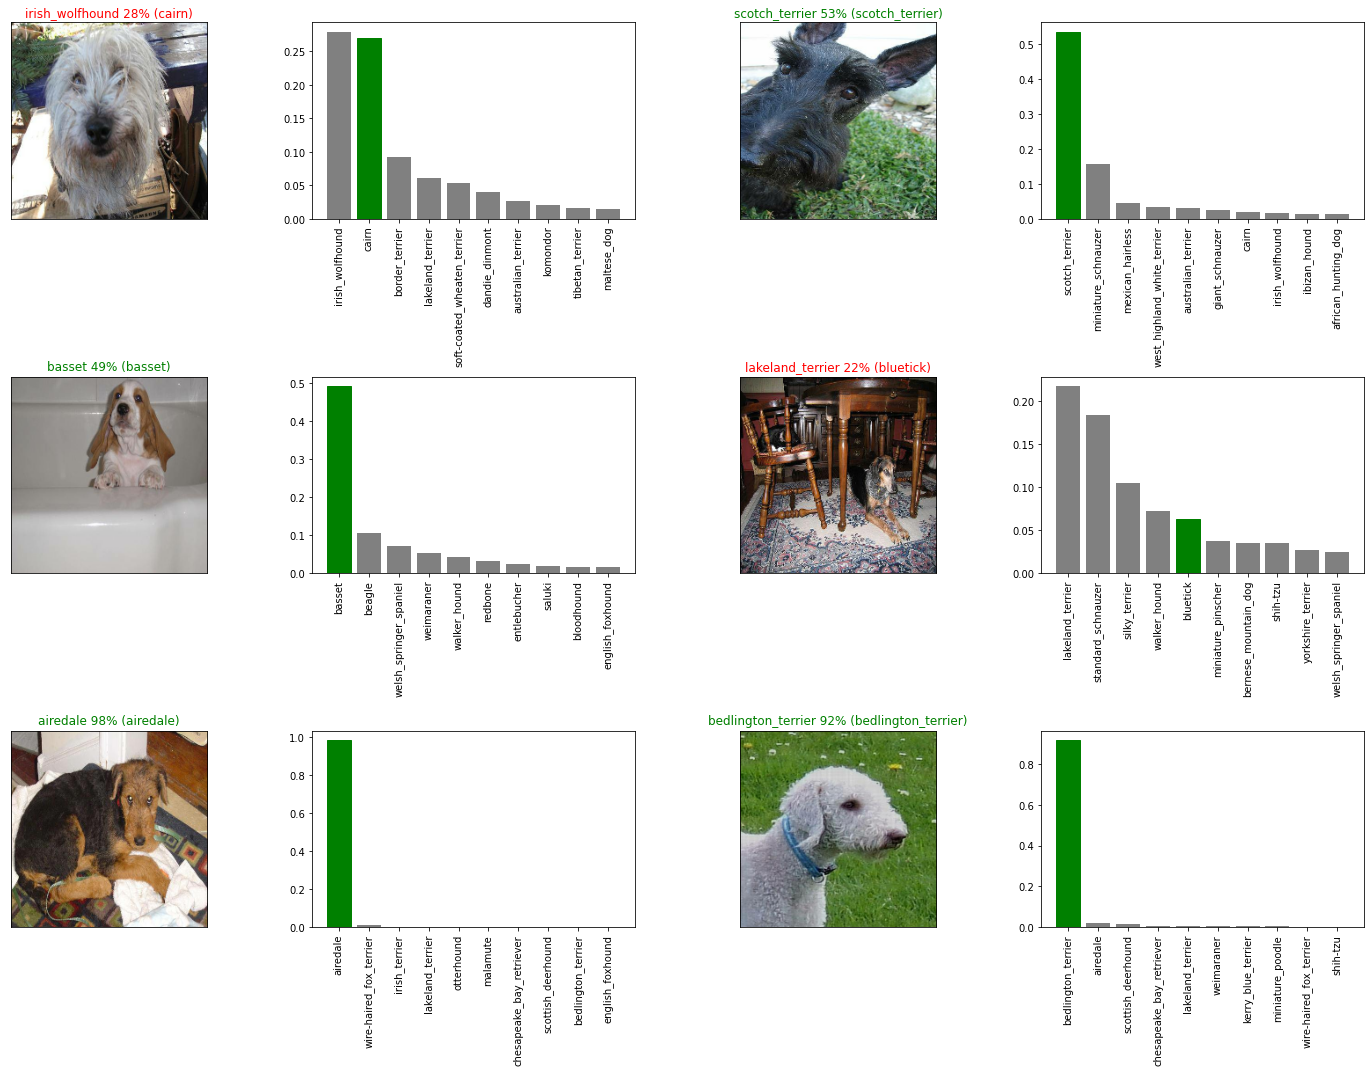

In [69]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## SAVING AND RELOADING A MODEL

In [75]:
def save_model(model, suffix=None):
 
  # Create model directory with current time
  modeldir = os.path.join("content/drive/MyDrive/Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [76]:
def load_model(model_path):

  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [77]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: content/drive/MyDrive/Data/models/20211229-06311640759482-1000-images-Adam.h5...


'content/drive/MyDrive/Data/models/20211229-06311640759482-1000-images-Adam.h5'

In [80]:
# Load our model trained on 1000 images
model_1000_images = load_model("content/drive/MyDrive/Data/models/20211229-06311640759482-1000-images-Adam.h5")

Loading saved model from: content/drive/MyDrive/Data/models/20211229-06311640759482-1000-images-Adam.h5


In [81]:
# Evaluate the pre-saved model
model.evaluate(val_data)

5/5 [==============================] - 2s 274ms/step - loss: 1.2137 - accuracy: 0.6700


[1.2137134075164795, 0.6700000166893005]

## TRAINING A MODEL ON FULL DATA

In [83]:
# turn full training data into data batch
full_data = create_data_batches(X, y)

Creating training data batches...


In [84]:
# instantiate a new model for training on the full data set
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [85]:
# create full model callbacks

#tensorboard callbacks
full_model_tensorboard = create_tensorboard_callback()

#early stopping callback
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
%tensorboard --logdir content/drive/MyDrive/Data/logs

In [88]:
# fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
244/244 [==============================] - 84s 304ms/step - loss: 1.4141 - accuracy: 0.6570
Epoch 2/100
244/244 [==============================] - 74s 302ms/step - loss: 0.4181 - accuracy: 0.8777
Epoch 3/100
244/244 [==============================] - 61s 250ms/step - loss: 0.2549 - accuracy: 0.9312
Epoch 4/100
244/244 [==============================] - 50s 206ms/step - loss: 0.1710 - accuracy: 0.9608
Epoch 5/100
244/244 [==============================] - 51s 208ms/step - loss: 0.1188 - accuracy: 0.9756
Epoch 6/100
244/244 [==============================] - 52s 212ms/step - loss: 0.0893 - accuracy: 0.9839
Epoch 7/100
244/244 [==============================] - 53s 217ms/step - loss: 0.0692 - accuracy: 0.9906
Epoch 8/100
244/244 [==============================] - 55s 226ms/step - loss: 0.0556 - accuracy: 0.9923
Epoch 9/100
244/244 [==============================] - 56s 230ms/step - loss: 0.0439 - accuracy: 0.9959
Epoch 10/100
244/244 [==============================] - 57s 233m

## SAVING AND RELOADING THE FULL MODEL


In [89]:
# Save model to file
save_model(full_model, suffix="all-images-Adam")

Saving model to: content/drive/MyDrive/Data/models/20211229-07091640761788-all-images-Adam.h5...


'content/drive/MyDrive/Data/models/20211229-07091640761788-all-images-Adam.h5'

In [91]:
# Load in the full model
loaded_full_model = load_model("content/drive/MyDrive/Data/models/20211229-07091640761788-all-images-Adam.h5")

Loading saved model from: content/drive/MyDrive/Data/models/20211229-07091640761788-all-images-Adam.h5


## making predictions on the test dataset


In [93]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "/content/drive/MyDrive/dog vision/test"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['/content/drive/MyDrive/dog vision/teste6295bd4afe5ddf93a02cbd668819e9e.jpg',
 '/content/drive/MyDrive/dog vision/teste51de127ddf2c492372a63f0644b1a58.jpg',
 '/content/drive/MyDrive/dog vision/teste35bb9ec7ff4410f0fb097569af4e66a.jpg',
 '/content/drive/MyDrive/dog vision/teste218c0da622fedc975a97999ad7d48a5.jpg',
 '/content/drive/MyDrive/dog vision/teste12731c30619c3fa4b0d9d9a76fb9d60.jpg',
 '/content/drive/MyDrive/dog vision/teste2e9e37fa587ad87761da12e105c2b6b.jpg',
 '/content/drive/MyDrive/dog vision/teste37be38e73463da5a0d9f3e33263d287.jpg',
 '/content/drive/MyDrive/dog vision/teste219af838e1d6a18224eb9b478944778.jpg',
 '/content/drive/MyDrive/dog vision/testdf577444ba8b7733f42c49e9d42111a9.jpg',
 '/content/drive/MyDrive/dog vision/teste4ec1e1a3e21d31f6e058c04655cb38b.jpg']

In [94]:
# How many test images are there?
len(test_filenames)

10357

In [95]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [103]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

NotFoundError: ignored